# Sperimentazione tesi

Errore quadratico medio: 36.517214730838624
Valore di R2 (standardizzazione dell'MSE):0.6015774471545623
Peso: 8.461091637115892
Bias: -30.571032410898336
Funzione f(x)=8.461091637115892x-30.571032410898336


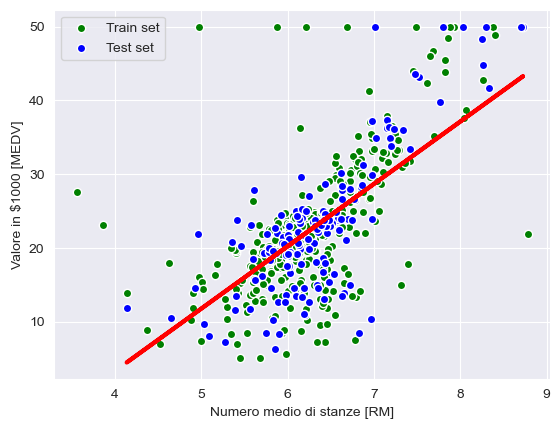

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

boston = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", sep='\s+', usecols=[5,13], names=["RM", "MEDV"])
boston.head()

X = boston.drop("MEDV", axis=1).values
Y = boston["MEDV"].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=1)

ll = LinearRegression()
ll.fit(X_train, Y_train) # fit per costruire il modello
Y_pred = ll.predict(X_test)

MSE = mean_squared_error(Y_test, Y_pred)
print("Errore quadratico medio: " + str(MSE))

R2S = r2_score(Y_test, Y_pred)
print("Valore di R2 (standardizzazione dell'MSE):" + str(R2S))

%matplotlib inline

print("Peso: "+ str(ll.coef_[0]))
print("Bias: "+str(ll.intercept_))
print("Funzione f(x)="+str(ll.coef_[0])+"x"+str(ll.intercept_))


plt.scatter(X_train, Y_train, c="green",  edgecolor='white', label="Train set")
plt.scatter(X_test, Y_test, c="blue",  edgecolor='white', label="Test set")

plt.xlabel('Numero medio di stanze [RM]')
plt.ylabel('Valore in $1000 [MEDV]')

plt.legend(loc='upper left')

plt.plot(X_test, Y_pred, color='red', linewidth=3)